In [1]:
import pandas as pd  

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')


In [2]:
Caffeine = pd.read_csv('caffeine.csv')

Caffeine.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [3]:
Caffeine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [4]:
Caffeine['type'].value_counts()

type
Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: count, dtype: int64

In [5]:
Caffeine['Calories/300ml'] = Caffeine['Calories']*300/Caffeine['Volume (ml)']
Caffeine['Caffeine (mg)/300ml'] = Caffeine['Caffeine (mg)']*300/Caffeine['Volume (ml)']
Caffeine.drop('Volume (ml)',axis=1,inplace=True)
Caffeine.drop('Calories',axis=1,inplace=True)
Caffeine.drop('Caffeine (mg)',axis=1,inplace=True)

In [6]:
Caffeine.head()

,drink,type,Calories/300ml,Caffeine (mg)/300ml
0,Costa Coffee,Coffee,0.000000,323.354211
1,Coffee Friend Brewed Coffee,Coffee,0.000000,173.866603
2,Hell Energy Coffee,Coffee,179.862003,119.908002
3,Killer Coffee (AU),Coffee,0.000000,515.604408
4,Nescafe Gold,Coffee,0.000000,79.139281


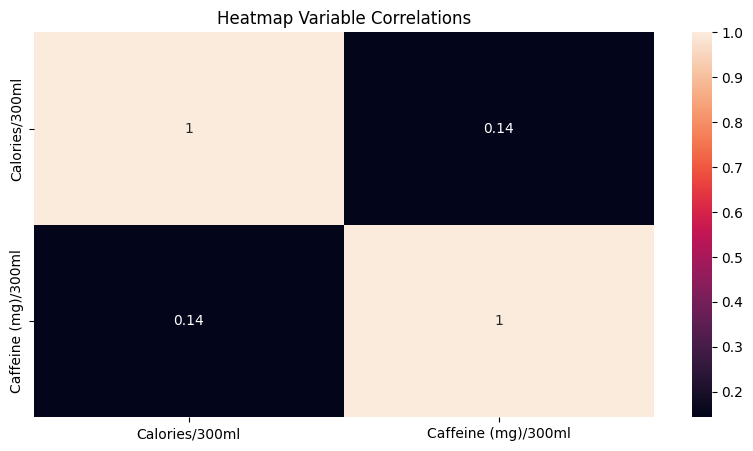

In [7]:
numeric_cols = Caffeine.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = Caffeine[numeric_cols].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap Variable Correlations')
plt.show()


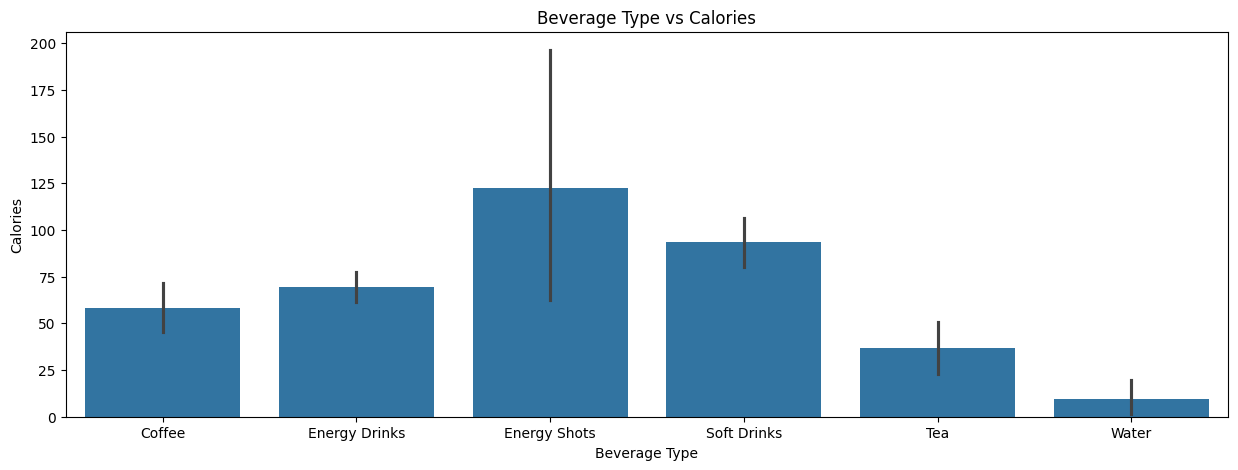

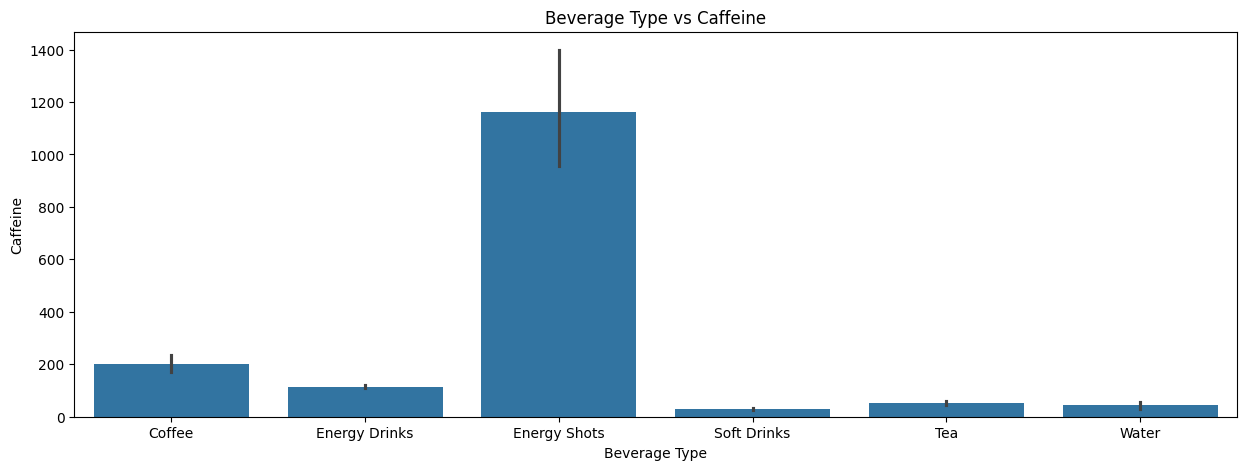

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x='type',y='Calories/300ml',data=Caffeine)
plt.title('Beverage Type vs Calories')
plt.xlabel('Beverage Type')
plt.ylabel('Calories')
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(x='type',y='Caffeine (mg)/300ml',data=Caffeine)
plt.title('Beverage Type vs Caffeine')
plt.xlabel('Beverage Type')
plt.ylabel('Caffeine')
plt.show()

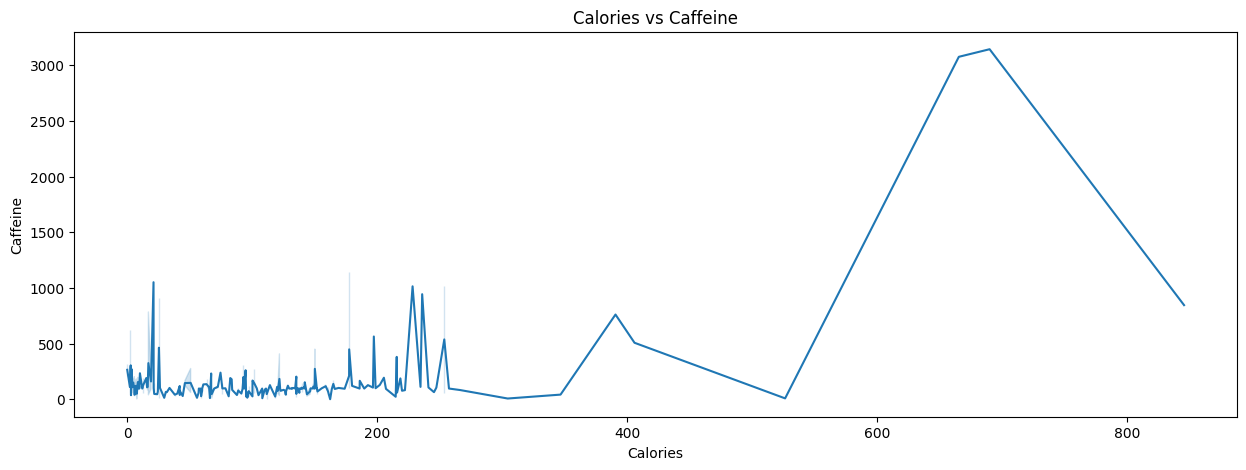

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Calories/300ml',y='Caffeine (mg)/300ml',data=Caffeine)
plt.title('Calories vs Caffeine')
plt.xlabel('Calories')
plt.ylabel('Caffeine')
plt.show()

In [10]:
Caffeine_clust = Caffeine.drop(['drink','type'],axis=1)
Caffeine_clust.head()

,Calories/300ml,Caffeine (mg)/300ml
0,0.000000,323.354211
1,0.000000,173.866603
2,179.862003,119.908002
3,0.000000,515.604408
4,0.000000,79.139281


In [11]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
col = Caffeine_clust.columns

Caffeine_clust_scaled = scaler.fit_transform(Caffeine_clust.values)
Caffeine_clust = pd.DataFrame(Caffeine_clust_scaled, columns=col)
Caffeine_clust.head()

,Calories/300ml,Caffeine (mg)/300ml
0,-0.760405,0.444142
1,-0.760405,-0.014119
2,1.281608,-0.179532
3,-0.760405,1.033495
4,-0.760405,-0.304511


In [12]:
from sklearn.neighbors import NearestNeighbors 
from random import sample
from numpy.random import uniform 
import numpy as np 
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins(Caffeine_clust)

0.9576144186925981

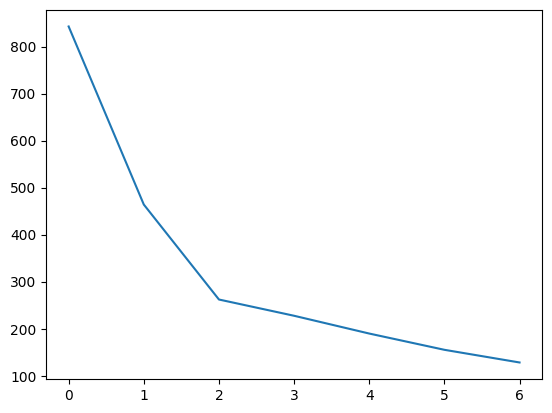

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Caffeine_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Caffeine_clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Caffeine_clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.543029411808346
For n_clusters=3, the silhouette score is 0.6277425074322996
For n_clusters=4, the silhouette score is 0.6427210328712564
For n_clusters=5, the silhouette score is 0.6440304599646033
For n_clusters=6, the silhouette score is 0.6533336399105023
For n_clusters=7, the silhouette score is 0.5338527435270277
For n_clusters=8, the silhouette score is 0.6223848810016819


In [16]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(Caffeine_clust)

KMeans(max_iter=100, n_clusters=3)

In [17]:
Caffeine['Cluster_ID'] = kmeans.labels_

In [18]:
Caffeine.head()

,drink,type,Calories/300ml,Caffeine (mg)/300ml,Cluster_ID
0,Costa Coffee,Coffee,0.000000,323.354211,0
1,Coffee Friend Brewed Coffee,Coffee,0.000000,173.866603,0
2,Hell Energy Coffee,Coffee,179.862003,119.908002,2
3,Killer Coffee (AU),Coffee,0.000000,515.604408,0
4,Nescafe Gold,Coffee,0.000000,79.139281,0


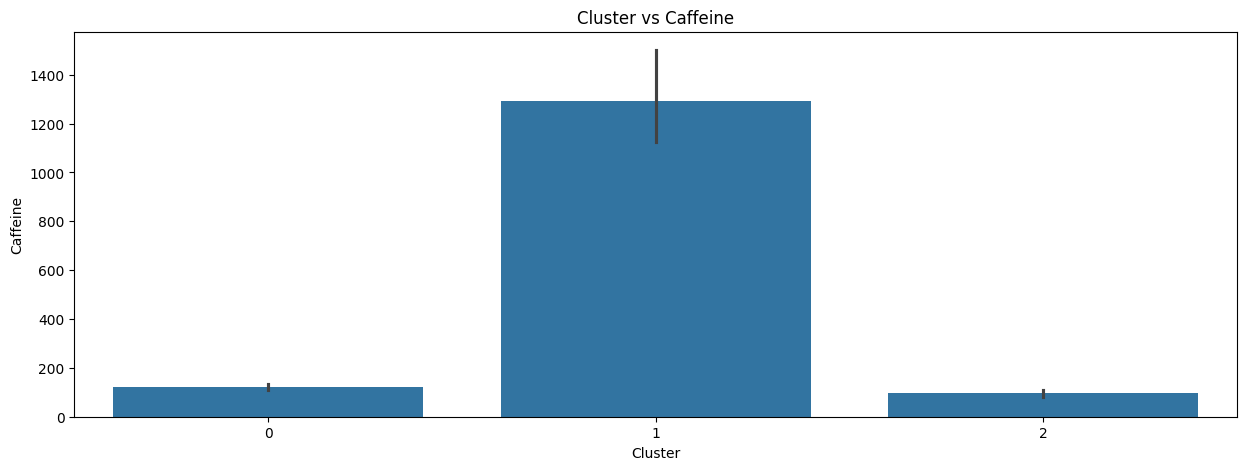

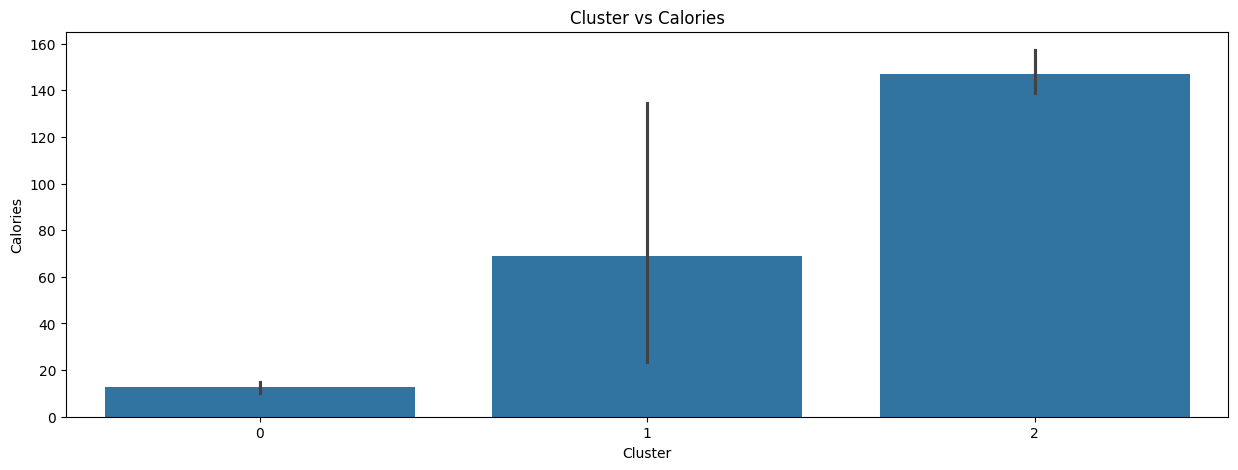

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Caffeine (mg)/300ml',data=Caffeine)
plt.title('Cluster vs Caffeine')
plt.xlabel('Cluster')
plt.ylabel('Caffeine')
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Calories/300ml',data=Caffeine)
plt.title('Cluster vs Calories')
plt.xlabel('Cluster')
plt.ylabel('Calories')
plt.show()

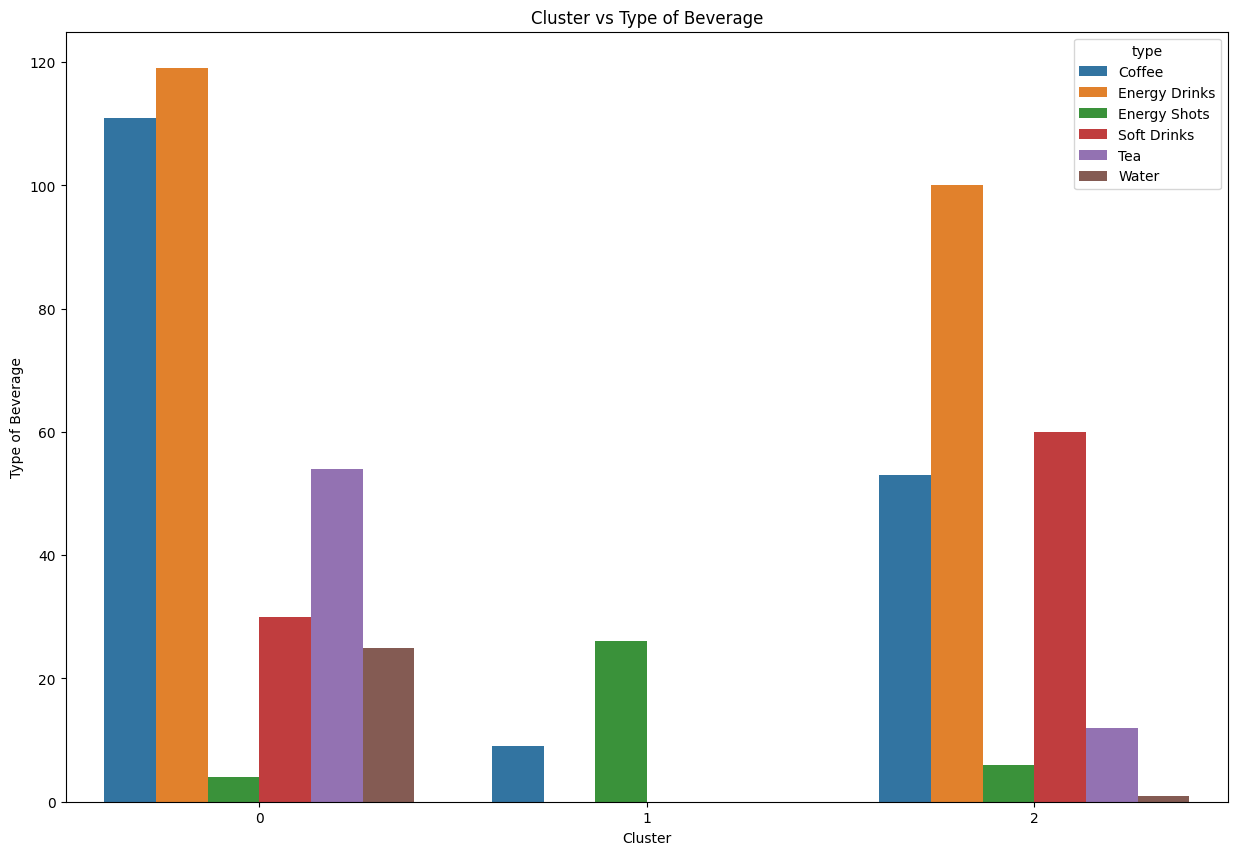

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x='Cluster_ID',hue='type',data=Caffeine)
plt.title('Cluster vs Type of Beverage')
plt.xlabel('Cluster')
plt.ylabel('Type of Beverage')
plt.show()

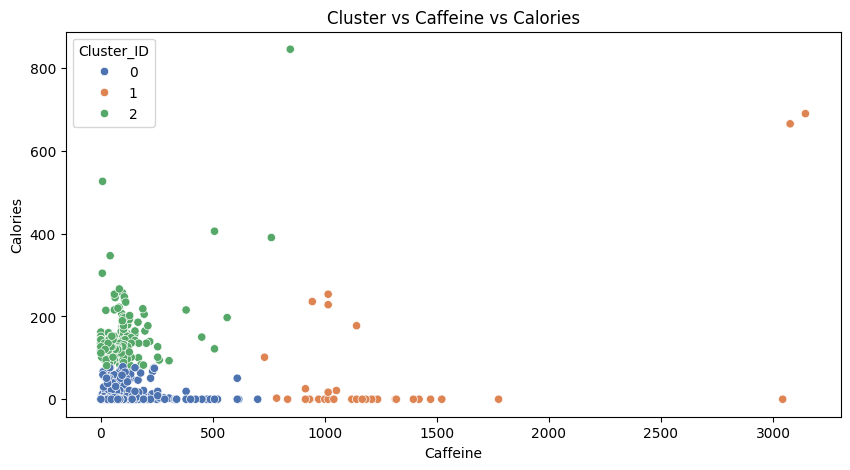

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Caffeine (mg)/300ml',y='Calories/300ml',hue='Cluster_ID',palette='deep',data=Caffeine)
plt.title('Cluster vs Caffeine vs Calories')
plt.xlabel('Caffeine')
plt.ylabel('Calories')
plt.show()

In [22]:
print('Cluster 1: ',list(Caffeine[Caffeine.Cluster_ID == 0].drink))
print(len(list(Caffeine[Caffeine.Cluster_ID == 0].drink)))

Cluster 1:  ['Costa Coffee', 'Coffee Friend Brewed Coffee', 'Killer Coffee (AU)', 'Nescafe Gold', 'Illy Issimo Cafe', 'TrueStart Performance Coffee', 'Bizzy Cold Brew', 'Zola Coconut Water Espresso', 'Stok Cold Brew', 'Caribou Canned Cold Brew', 'Stumptown Cold Brew Coffee', 'Espresso Shot', "Peet's Coffee Espresso", "Peet's Decaf Espresso", 'Gourmesso Coffee Pods', 'Nespresso Coffee Capsules', 'Starbucks Bottled Iced Coffee', "Dunkin' Cold Brew", "Dunkin' Donuts Iced Coffee", "Dunkin' Donuts Iced Latte", 'Dutch Bros Coffee (Classic)', 'Tim Hortons Large Brewed Coffee', '7 Eleven Brewed Coffee', 'Biggby Brewed Coffee', 'Biggby Iced Coffee', 'Caribou Brewed Coffee', 'Coffee Bean & Tea leaf Coffee', 'Einstein Bros Coffee', 'McDonalds Coffee', 'Panera Bread Coffee', "Peet's Brewed Coffee", "Peet's Caffe Americano", "Peet's Iced Coffee", "Peet's Iced Latte", 'Starbucks Cold Brew Coffee', 'Starbucks Decaf Coffee', 'Starbucks Grande Caffe Americano', 'Starbucks Grande Coffee', 'Starbucks Ice

In [23]:
print('Cluster 2: ',list(Caffeine[Caffeine.Cluster_ID == 1].drink))
print(len(list(Caffeine[Caffeine.Cluster_ID == 1].drink)))

Cluster 2:  ['Stok Coffee Shots', 'Biohazard Coffee', 'Black Insomnia Coffee', 'Black Label Brewed Coffee', 'Cannonball Coffee Maximum Charge (UK)', 'Devils Brew Extreme Caffeine Coffee', 'High Voltage Coffee (AU)', 'Taft Coffee (EU)', 'Very Strong Coffee', 'Spike Energy Double Shot', 'Proper Wild Energy Shot', 'Redline Max 300', '5 Hour Energy', '5 Hour Energy Extra Strength', 'E6 Energy Shot', 'Eternal Energy Extra Strength', 'Eternal Energy Shot', 'Woke Up Energy Shot', 'Screamin Energy Max Hit', 'Vital 4U Liquid Energy', 'Kaffn8 Liquified Caffeine', 'Bang Shot', 'Redline Xtreme Shot', '7-Eleven Energy Shot', 'Forto Organic Coffee Shot', 'Kirkland Energy Shot', 'Neu Nootropic Shot', 'Nutramint Smart Serum', 'Performance Caffeine', 'Phoenix Energy Shot', 'Red Thunder Extra Strength', 'Stacker Extreme Energy Shot', 'Tweaker Shot', 'TruBrain Extra', 'X-Mode Energy Shot']
35


In [24]:
print('Cluster 3: ',list(Caffeine[Caffeine.Cluster_ID == 2].drink))
print(len(list(Caffeine[Caffeine.Cluster_ID == 2].drink)))

Cluster 3:  ['Hell Energy Coffee', 'Espresso Monster', 'Dunkin Donuts Shot In The Dark', 'Starbucks Doubleshot Espresso', 'Barista Bros Iced Coffee', 'Dare Iced Coffee', 'V Iced Coffee', 'Bottled Iced Coffee Dunkin Donuts', 'Starbucks Bottled Frappuccino', 'Wide Awake Iced Coffee Drinks', 'McDonalds Iced Coffee', 'Premier Protein Cafe Latte', 'Baskin Robbins Cappuccino Blast', "Arby's Jamocha Shake", 'Biggby Creamy Lattes', 'Latte', 'McDonalds (McCafe) Latte', 'McDonalds (McCafe) Mocha', "Peet's Caffe Latte", "Peet's Caffe Mocha", "Peet's Cappuccino", "Peet's Iced Mocha", 'Starbucks Caramel Macchiato', 'Starbucks Grande Caffe Latte', 'Starbucks Grande Caffe Mocha', 'Starbucks Grande Cappuccino', 'Starbucks Pink Drink', 'Starbucks Pumpkin Cream Cold Brew', 'Private Selection Canned Espresso', 'Starbucks Doubleshot Energy', 'Wide Awak Energy Coffee', 'Chick-fil-A Frosted Coffee', 'Chick-fil-A Iced Coffee', "Dunkin' Donuts Dunkaccino", 'Big Train Java Chip Ice Coffee', 'Caffe Mocha', 'Cap

In [25]:
cluster_centers = kmeans.cluster_centers_

In [28]:
for cluster_ID, center in enumerate(cluster_centers):
    print(f"average cluster {cluster_ID}:", center)
    cluster_ID+=cluster_ID

average cluster 0: [-0.61759858 -0.17542046]
average cluster 1: [0.0237967  3.41236349]
average cluster 2: [ 0.90949754 -0.25544614]
